데이터: https://www.schoolinfo.go.kr/ng/go/pnnggo_a01_l2.do

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
# macOS 기본 한글 폰트 설정 (AppleSDGothicNeo 등)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [4]:
path = '/Users/yniyunj/Desktop/교육공공데이터/데이터/002-전출입생수/'

df24 = pd.read_csv(path + '2024년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df23 = pd.read_csv(path + '2023년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df22 = pd.read_csv(path + '2022년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df21 = pd.read_csv(path + '2021년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df20 = pd.read_csv(path + '2020년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df19 = pd.read_csv(path + '2019년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df18 = pd.read_csv(path + '2018년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df17 = pd.read_csv(path + '2017년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df16 = pd.read_csv(path + '2016년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')
df15 = pd.read_csv(path + '2015년도_전·출입 및 학업중단 학생 수(초)_전체.csv', encoding = 'utf-8')

In [5]:
df24.head(3)

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,1학년 전입학생수,...,4학년 전체학생수,5학년 전입학생수,5학년 전출학생수,5학년 전체학생수,6학년 전입학생수,6학년 전출학생수,6학년 전체 학생수,전입학생수(계),전출학생수(계),전체학생수(계)
0,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,5.0,...,104.0,2.0,1.0,108.0,1.0,1.0,110.0,31.0,12.0,610.0
1,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,S000003563,서울대학교사범대학부설초등학교,2,국립,N,NaN,1.0,...,106.0,3.0,2.0,105.0,2.0,0.0,100.0,23.0,15.0,595.0
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000737,서울개원초등학교,2,공립,N,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def preprocess_student_df(df, year):
    drop_columns = ['시도교육청', '교육지원청', '정보공시 학교코드', '학교급코드', '제외여부', '제외사유']
    df = df.drop(columns=drop_columns)

    # 공백 문제 해결
    df = df.rename(columns={'6학년 전체 학생수': '6학년 전체학생수'})

    # 키워드 단축 매핑
    suffix_map = {
        '전입학생수': 'in',
        '전출학생수': 'out',
        '전체학생수': 'ttl'
    }

    renamed_columns = {}
    grade_map = {}
    for col in df.columns:
        col_clean = col.replace(' 전체 학생수', ' 전체학생수')  # 공백 일관화
        if '학년' in col and any(x in col for x in suffix_map):
            grade = int(col[0])
            birth_year = year - grade - 6  # 만6세 입학 기준
            suffix_key = next((key for key in suffix_map if key in col_clean), None)
            suffix = suffix_map[suffix_key]
            new_col = f"{year}-{birth_year % 100:02d}_{suffix}"
            renamed_columns[col] = new_col
            grade_map[new_col] = grade

    df.columns = [renamed_columns.get(c, c) for c in df.columns]
    return df, grade_map

In [7]:
df24, grade_map24 = preprocess_student_df(df24, 2024)
df23, grade_map23 = preprocess_student_df(df23, 2023)
df22, grade_map22 = preprocess_student_df(df22, 2022)
df21, grade_map21 = preprocess_student_df(df21, 2021)
df20, grade_map20 = preprocess_student_df(df20, 2020)
df19, grade_map19 = preprocess_student_df(df19, 2019)
df18, grade_map18 = preprocess_student_df(df18, 2018)
df17, grade_map17 = preprocess_student_df(df17, 2017)
df16, grade_map16 = preprocess_student_df(df16, 2016)
df15, grade_map15 = preprocess_student_df(df15, 2015)

In [8]:
df24.head(3)

,지역,학교명,설립구분,2024-17_in,2024-17_out,2024-17_ttl,2024-16_in,2024-16_out,2024-16_ttl,2024-15_in,...,2024-14_ttl,2024-13_in,2024-13_out,2024-13_ttl,2024-12_in,2024-12_out,2024-12_ttl,전입학생수(계),전출학생수(계),전체학생수(계)
0,서울특별시 서초구,서울교육대학교부설초등학교,국립,5.0,2.0,96.0,5.0,1.0,96.0,7.0,...,104.0,2.0,1.0,108.0,1.0,1.0,110.0,31.0,12.0,610.0
1,서울특별시 종로구,서울대학교사범대학부설초등학교,국립,1.0,1.0,84.0,6.0,1.0,98.0,7.0,...,106.0,3.0,2.0,105.0,2.0,0.0,100.0,23.0,15.0,595.0
2,서울특별시 강남구,서울개원초등학교,공립,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_elec2

,번호,충전소명,충전소ID,충전기ID,충전기타입,소재지 도로명 주소,위도,경도,이용가능시간,기관ID,운영기관명,관리업체 전화번호,충전기상태,상태갱신일시,충전기용량,지역코드,주차료무료 여부,충전소 안내
0,1,어린이대공원 후문주차장,ME174016,1,급속,서울특별시 광진구 능동로 216,37.551507,127.086928,24시간 이용가능,ME,환경부,1661-9408,사용가능,20210124215343,급속(50kW),11,무료,NaN
1,2,포르쉐 데스티네이션 그랜드워커힐 서울,CV000752,1,완속,서울특별시 광진구 워커힐로 177,37.557607,127.110977,24시간 이용가능,CV,대영채비(주),1522-2573,사용가능,20210125000540,NaN,11,무료,NaN
2,3,포르쉐 데스티네이션 비스타워커힐 서울,CV000753,1,완속,서울특별시 광진구 워커힐로 177,37.557607,127.110977,24시간 이용가능,CV,대영채비(주),1522-2573,사용가능,20210125000540,NaN,11,무료,NaN
3,4,구의3동 공영주차장,CV000781,1,급속,서울특별시 광진구 광나루로52길 83,37.539152,127.091363,24시간 이용가능,CV,대영채비(주),1522-2573,사용가능,20210125051629,NaN,11,무료,NaN
4,5,자양동구의현대홈시티,EV000094,1,완속,서울특별시 광진구 자양로 109,37.537408,127.083099,"24시간 이용가능,입주민만 사용가능 거주자외출입제한",EV,에버온,1661-7766,사용가능,20210125034406,NaN,11,무료,입주민만 사용가능 거주자외 출입제한
5,6,광진두산위브파크,EV000096,1,완속,"서울특별시 광진구 광나루로 369 (군자동, 광진두산위브파크)",37.548462,127.071048,"24시간 이용가능,입주민만 사용가능 거주자외출입제한",EV,에버온,1661-7766,사용가능,20210125004206,NaN,11,무료,입주민만 사용가능 거주자외 출입제한
6,7,서울광진 광장유진스웰,EV002001,1,완속,서울특별시 광진구 아차산로78길 7,37.550376,127.109295,"24시간 이용가능,입주민만 사용가능 거주자외출입제한",EV,주식회사 에버온,1661-7766,사용가능,20201222052707,NaN,11,무료,입주민만 사용가능 거주자외 출입제한
7,8,서울 광진한화꿈에그린아파트,EV003142,1,완속,서울특별시 광진구 뚝섬로24길 74,37.533797,127.061888,"24시간 이용가능,입주민만 사용가능 거주자외출입제한",EV,주식회사 에버온,1661-7766,사용가능,20210125032512,NaN,11,무료,입주민만 사용가능 거주자 외 출입제한
8,9,광진두산위브파크101동,EV003183,1,완속,서울특별시 광진구 광나루로 369,37.548438,127.070829,"24시간 이용가능,입주민만 사용가능 거주자외출입제한",EV,주식회사 에버온,1661-7766,사용가능,20210124172012,NaN,11,무료,입주민만 사용가능 거주자외 출입제한
9,10,구의7단지아파트,GN020436,1,완속,"서울특별시 광진구 구의강변로3가길 39(구의동, 구의7단지조합현대아파트)",37.536510,127.091390,24시간 이용가능,GN,지엔텔,1544-4279,사용가능,20210124134023,NaN,11,무료,NaN


In [10]:
def get_all_schools_melted_data(dfs: dict, grade_maps: dict):
    all_years_data = []

    for year, df in dfs.items():
        grade_map = grade_maps[year]  # 각 연도별 학년 매핑 dict

        # 열 중 출생년도 기반 컬럼만 필터링
        value_vars = [col for col in df.columns if '-' in col and any(s in col for s in ['_in', '_out', '_ttl'])]

        melted = df.melt(
            id_vars=['지역', '학교명', '설립구분'],
            value_vars=value_vars,
            var_name='year_type',
            value_name='학생수'
        )

        # 학년 정보 매핑
        melted['학년'] = melted['year_type'].map(grade_map)

        # 열 이름 파싱: 2024-17_in → 연도, 출생년도, 구분
        melted[['기준연도', '출생년도', '구분']] = melted['year_type'].str.extract(r'(\d{4})-(\d{2})_(in|out|ttl)')
        melted = melted.drop(columns=['year_type'])

        all_years_data.append(melted)

    # 통합
    result_df = pd.concat(all_years_data, ignore_index=True)

    # 정리
    result_df['기준연도'] = result_df['기준연도'].astype(int)
    result_df['출생년도'] = result_df['출생년도'].astype(int).apply(lambda x: f"{x:02d}")
    result_df['학생수'] = result_df['학생수'].fillna(0).astype(int)
    result_df['학년'] = result_df['학년'].astype(str) + '학년'

    result_df = result_df.sort_values(by=['학교명', '출생년도'])

    return result_df[['설립구분', '지역', '학교명', '기준연도', '출생년도', '학년', '구분', '학생수']]

In [11]:
dfs = {
    2024: df24,
    2023: df23,
    2022: df22,
    2021: df21,
    2020: df20,
    2019: df19,
    2018: df18,
    2017: df17,
    2016: df16,
    2015: df15
}

grade_maps = {
    2024: grade_map24,
    2023: grade_map23,
    2022: grade_map22,
    2021: grade_map21,
    2020: grade_map20,
    2019: grade_map19,
    2018: grade_map18,
    2017: grade_map17,
    2016: grade_map16,
    2015: grade_map15
}

all_school_data = get_all_schools_melted_data(dfs, grade_maps)
all_school_data

,설립구분,지역,학교명,기준연도,출생년도,학년,구분,학생수
1114862,공립,전라남도 신안군,가거도초등학교,2015,03,6학년,in,0
1121073,공립,전라남도 신안군,가거도초등학교,2015,03,6학년,out,1
1127284,공립,전라남도 신안군,가거도초등학교,2015,03,6학년,ttl,0
1003056,공립,전라남도 신안군,가거도초등학교,2016,04,6학년,in,0
1009275,공립,전라남도 신안군,가거도초등학교,2016,04,6학년,out,0
...,...,...,...,...,...,...,...,...
122245,공립,경기도 안양시 동안구,희성초등학교,2023,16,1학년,out,3
128552,공립,경기도 안양시 동안구,희성초등학교,2023,16,1학년,ttl,44
2504,공립,경기도 안양시 동안구,희성초등학교,2024,17,1학년,in,2
8806,공립,경기도 안양시 동안구,희성초등학교,2024,17,1학년,out,5


In [81]:
# 출생년도별로 고유 학년 수를 센다
grade_count = all_school_data.groupby('출생년도')['학년'].nunique()

# 1~6학년이 모두 존재하는 출생년도만 필터링
full_grade_years = grade_count[grade_count == 6].index.tolist()
print(full_grade_years)

# 조건에 맞는 행만 필터링
df_filtered = all_school_data[all_school_data['출생년도'].isin(full_grade_years)]

# 결과 확인
df_filtered
df_filtered.to_csv(path + '002_all_daechi_scool_data', index=False)

['08', '09', '10', '11', '12']


In [82]:
df_filtered

,설립구분,지역,학교명,기준연도,출생년도,학년,구분,학생수
553305,공립,전라남도 신안군,가거도초등학교,2020,08,6학년,in,0
559594,공립,전라남도 신안군,가거도초등학교,2020,08,6학년,out,1
565883,공립,전라남도 신안군,가거도초등학교,2020,08,6학년,ttl,3
647330,공립,전라남도 신안군,가거도초등학교,2019,08,5학년,in,1
653595,공립,전라남도 신안군,가거도초등학교,2019,08,5학년,out,0
...,...,...,...,...,...,...,...,...
481729,공립,경기도 안양시 동안구,희성초등학교,2020,12,2학년,out,4
488018,공립,경기도 안양시 동안구,희성초등학교,2020,12,2학년,ttl,63
569772,공립,경기도 안양시 동안구,희성초등학교,2019,12,1학년,in,0
576037,공립,경기도 안양시 동안구,희성초등학교,2019,12,1학년,out,6


## '지역'이 null인 것들 채워주기

In [83]:
df_filtered[df_filtered['지역'].isnull()]['학교명'].unique()

array(['가천초등학교무학분교장', '금당초등학교', '부림초등학교', '부원초등학교', '부일초등학교', '부천남초등학교',
       '삼근초등학교광회분교장', '삼근초등학교왕피분교장', '속초초등학교노천분교장', '속초초등학교월운분교장',
       '속초초등학교좌운분교장', '압해초등학교고이분교장', '영월초등학교연상분교장', '일광초등학교(폐교)',
       '전주팔복초등학교'], dtype=object)

In [84]:
school_location_map = {
    '가천초등학교무학분교장': '경상북도 성주군', '금당초등학교': '경기도 여주시 가남읍',
    '부림초등학교': '경상북도 경산시 진량읍', '부원초등학교': '경기도 부천시 소사구',
    '부일초등학교': '경기도 부천시 원미구', '부천남초등학교': '경기도 부천시 소사구',
    '삼근초등학교광회분교장': '경상북도 울진군', '삼근초등학교왕피분교장': '경상북도 울진군',
    '속초초등학교노천분교장': '강원도 홍천군', '속초초등학교월운분교장': '강원도 홍천군',
    '속초초등학교좌운분교장': '강원도 홍천군', '압해초등학교고이분교장': '전라남도 신안군',
    '영월초등학교연상분교장': '강원도 영월군', '일광초등학교(폐교)': '부산광역시 기장군', '전주팔복초등학교': '전라북도 전주시 덕진구'
}

# '학교명' 기준으로 '지역' 결측값 채우기
df_filtered['지역'] = df_filtered['지역'].fillna(df_filtered['학교명'].map(school_location_map))
df_filtered.info()

/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_37495/2221006718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['지역'] = df_filtered['지역'].fillna(df_filtered['학교명'].map(school_location_map))


<class 'pandas.core.frame.DataFrame'>
Index: 564705 entries, 553305 to 582302
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   설립구분    564705 non-null  object
 1   지역      564705 non-null  object
 2   학교명     564705 non-null  object
 3   기준연도    564705 non-null  int64 
 4   출생년도    564705 non-null  object
 5   학년      564705 non-null  object
 6   구분      564705 non-null  object
 7   학생수     564705 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 38.8+ MB


## 충청북도 학교만 필터링

In [85]:
df_filtered

,설립구분,지역,학교명,기준연도,출생년도,학년,구분,학생수
553305,공립,전라남도 신안군,가거도초등학교,2020,08,6학년,in,0
559594,공립,전라남도 신안군,가거도초등학교,2020,08,6학년,out,1
565883,공립,전라남도 신안군,가거도초등학교,2020,08,6학년,ttl,3
647330,공립,전라남도 신안군,가거도초등학교,2019,08,5학년,in,1
653595,공립,전라남도 신안군,가거도초등학교,2019,08,5학년,out,0
...,...,...,...,...,...,...,...,...
481729,공립,경기도 안양시 동안구,희성초등학교,2020,12,2학년,out,4
488018,공립,경기도 안양시 동안구,희성초등학교,2020,12,2학년,ttl,63
569772,공립,경기도 안양시 동안구,희성초등학교,2019,12,1학년,in,0
576037,공립,경기도 안양시 동안구,희성초등학교,2019,12,1학년,out,6


In [86]:
df_filtered = df_filtered[df_filtered['지역'].str.contains('충청북도', regex=True)]
df_filtered

,설립구분,지역,학교명,기준연도,출생년도,학년,구분,학생수
552154,공립,충청북도 청주시 흥덕구,가경초등학교,2020,08,6학년,in,1
558443,공립,충청북도 청주시 흥덕구,가경초등학교,2020,08,6학년,out,3
564732,공립,충청북도 청주시 흥덕구,가경초등학교,2020,08,6학년,ttl,57
646179,공립,충청북도 청주시 흥덕구,가경초등학교,2019,08,5학년,in,2
652444,공립,충청북도 청주시 흥덕구,가경초등학교,2019,08,5학년,out,3
...,...,...,...,...,...,...,...,...
483020,공립,충청북도 청주시 흥덕구,흥덕초등학교,2020,12,2학년,out,4
489309,공립,충청북도 청주시 흥덕구,흥덕초등학교,2020,12,2학년,ttl,47
571044,공립,충청북도 청주시 흥덕구,흥덕초등학교,2019,12,1학년,in,1
577309,공립,충청북도 청주시 흥덕구,흥덕초등학교,2019,12,1학년,out,5


In [87]:
df_filtered.to_csv(path + '250425-충청북도_5개년_학교별_학년별_전출입생수.csv')

In [88]:
df_filtered.drop(['기준연도', '출생년도'], axis=1).groupby(['설립구분', '지역', '학교명', '학년', '구분']).sum('학생수')

학생수
설립구분 지역           학교명      학년  구분      
공립   충청북도 괴산군     감물초등학교   1학년 in     5
                               out    3
                               ttl   43
                           2학년 in     1
                               out    3
...                                 ...
사립   충청북도 청주시 청원구 청주대성초등학교 5학년 out   34
                               ttl  341
                           6학년 in     7
                               out   18
                               ttl  324

[5007 rows x 1 columns]

In [89]:
df_filtered['학교명'].nunique()

286

## 좌표 위경도 변환

- 학교기본정보(초)_충청북도교육청.csv에서 제공하는 위경도에서 누락된 항목도 있고, 소수 첫째자리까지밖에 안나와있는 학교도 있어서 일괄 다시 처리해줌
- 위 csv 파일에서 '학교도로명 주소'를 활용하여 네이버 클라우드 지오코딩 api를 사용했음

In [149]:
df_schools = pd.read_csv(path + '학교기본정보(초)_충청북도교육청.csv')
df_schools = df_schools[['학교명','위도', '경도','학교도로명 주소', '폐교여부']]
df_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교명       297 non-null    object 
 1   위도        290 non-null    float64
 2   경도        290 non-null    float64
 3   학교도로명 주소  290 non-null    object 
 4   폐교여부      297 non-null    object 
dtypes: float64(2), object(3)
memory usage: 11.7+ KB


In [150]:
df_schools.to_csv(path + '250425-충청북도_학교별_위도경도주소.csv')

In [151]:
df_schools[df_schools['학교도로명 주소'].isnull()]

,학교명,위도,경도,학교도로명 주소,폐교여부
8,문광초등학교덕평분교장,NaN,NaN,NaN,Y
77,이원초등학교지탄분교장,36.243348,127.681950,NaN,Y
85,남신초등학교덕생분교장,36.914176,127.623369,NaN,Y
138,진천삼수초등학교매산분교장,NaN,NaN,NaN,Y
150,남일초등학교두산분교장,NaN,NaN,NaN,Y
228,노은초등학교수상분교장,37.051467,127.715350,NaN,Y
237,엄정초등학교목계분교장,NaN,NaN,NaN,Y


In [152]:
address_mapping = {
    '문광초등학교덕평분교장': '충청북도 괴산군 청천면 송문로덕평2길 42',
    '이원초등학교지탄분교장': '충청북도 옥천군 이원면 지탄리 734-5',
    '남신초등학교덕생분교장': '충청북도 음성군 음성읍 덕생로 495-7',
    '진천삼수초등학교매산분교장': '충청북도 진천군 덕산읍 산삼로 46',
    '남일초등학교두산분교장': '충청북도 청주시 상당구 남일면 두산길 53',
    '노은초등학교수상분교장': '충청북도 충주시 노은면 감노로 1055',
    '엄정초등학교목계분교장': '충청북도 충주시 엄정면 안암목계길 11'
}

df_schools['학교도로명 주소'] = df_schools.apply(
    lambda row: address_mapping.get(row['학교명'], row['학교도로명 주소']),
    axis=1
)
df_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교명       297 non-null    object 
 1   위도        290 non-null    float64
 2   경도        290 non-null    float64
 3   학교도로명 주소  297 non-null    object 
 4   폐교여부      297 non-null    object 
dtypes: float64(2), object(3)
memory usage: 11.7+ KB


In [153]:
import pandas as pd
import requests
from urllib.parse import quote
from tqdm import tqdm

# ✅ 인증 정보
client_id = '4tayclay5r'
client_secret = '8ANrXhBfqTuXsu5pWdNAAQq2nyVepP9jolAbustp'

# ✅ Geocoding 함수
def geocode_address(address):
    if pd.isna(address) or not isinstance(address, str) or address.strip() == "":
        return None, None

    encoded_address = quote(address)
    url = f'https://maps.apigw.ntruss.com/map-geocode/v2/geocode?query={encoded_address}'

    headers = {
        'X-NCP-APIGW-API-KEY-ID': client_id,
        'X-NCP-APIGW-API-KEY': client_secret,
        'Accept': 'application/json'
    }

    try:
        response = requests.get(url, headers=headers, timeout=3)
        if response.status_code == 200:
            data = response.json()
            if data['addresses']:
                location = data['addresses'][0]
                return location['y'], location['x']
            else:
                return None, None
        else:
            return None, None
    except Exception as e:
        print(f"❌ 요청 실패: {address} - {e}")
        return None, None

# ✅ 위경도 변환 적용
tqdm.pandas()  # 진행률 표시
df_schools[['new위도', 'new경도']] = df_schools['학교도로명 주소'].progress_apply(
    lambda x: pd.Series(geocode_address(x))
)

  0%|          | 0/297 [00:00<?, ?it/s]

100%|██████████| 297/297 [03:00<00:00,  1.65it/s]


In [154]:
df_schools

,학교명,위도,경도,학교도로명 주소,폐교여부,new위도,new경도
0,청주교육대학교부설초등학교,36.617384,127.484696,충청북도 청주시 서원구 청남로 2067,N,36.6172449,127.4847407
1,한국교원대학교부설월곡초등학교,36.623295,127.362370,충청북도 청주시 흥덕구 강내면 가로수로 562,N,36.6223850,127.3628220
2,감물초등학교,36.839123,127.871318,충청북도 괴산군 감물면 남양동길 38,N,36.8391229,127.8713183
3,괴산명덕초등학교,36.809356,127.787067,충청북도 괴산군 괴산읍 읍내로4길 53,N,36.8093562,127.7870670
4,도안초등학교,36.817063,127.611156,충청북도 증평군 도안면 화성로 101,N,36.8170627,127.6111564
...,...,...,...,...,...,...,...
292,충주남한강초등학교,36.955149,127.929254,충청북도 충주시 호암수청2로 55,N,36.9551444,127.9292397
293,용아초등학교,36.618207,127.522274,충청북도 청주시 상당구 중고개로142번길 32-15,N,36.6182518,127.5227194
294,용원초등학교동락분교장,37.003210,127.686710,충청북도 충주시 신니면 신덕로 301,N,37.0034500,127.6861380
295,영춘초등학교별방분교장,37.096424,128.415927,충청북도 단양군 영춘면 별방창원로 449,N,37.0963571,128.4158125


In [155]:
df_schools[['학교명', 'new위도', 'new경도', '학교도로명 주소', '폐교여부']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   학교명       297 non-null    object
 1   new위도     295 non-null    object
 2   new경도     295 non-null    object
 3   학교도로명 주소  297 non-null    object
 4   폐교여부      297 non-null    object
dtypes: object(5)
memory usage: 11.7+ KB


In [156]:
df_schools[df_schools['new위도'].isnull()]

,학교명,위도,경도,학교도로명 주소,폐교여부,new위도,new경도
171,외천초등학교,36.540986,127.432369,충북 청원군 부용면 부용외천2길 13-2,Y,None,None
184,내곡초등학교,36.660199,127.428888,충청북도 청주시 흥덕구 내곡로 6,Y,None,None


In [157]:
# 'new위도', 'new경도'가 None일 경우 '위도', '경도' 값을 채워넣기
df_schools['new위도'] = df_schools.apply(
    lambda row: row['위도'] if pd.isna(row['new위도']) or row['new위도'] is None else row['new위도'],
    axis=1
)

df_schools['new경도'] = df_schools.apply(
    lambda row: row['경도'] if pd.isna(row['new경도']) or row['new경도'] is None else row['new경도'],
    axis=1
)

In [159]:
df_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교명       297 non-null    object 
 1   위도        290 non-null    float64
 2   경도        290 non-null    float64
 3   학교도로명 주소  297 non-null    object 
 4   폐교여부      297 non-null    object 
 5   new위도     297 non-null    object 
 6   new경도     297 non-null    object 
dtypes: float64(2), object(5)
memory usage: 16.4+ KB


In [162]:
df_schools = df_schools.drop(['위도', '경도'], axis=1)

KeyError: "['위도', '경도'] not found in axis"

In [163]:
df_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   학교명       297 non-null    object
 1   학교도로명 주소  297 non-null    object
 2   폐교여부      297 non-null    object
 3   new위도     297 non-null    object
 4   new경도     297 non-null    object
dtypes: object(5)
memory usage: 11.7+ KB


In [1]:
df_schools.to_csv(path + '250425-충청북도_학교별_주소_new위도_new경도.csv', index=False)

NameError: name 'df_schools' is not defined

---

In [92]:
# 출생년도별로 고유 학년 수를 센다
grade_count = df_daechi.groupby('출생년도')['학년'].nunique()

# 1~6학년이 모두 존재하는 출생년도만 필터링
full_grade_years = grade_count[grade_count == 6].index.tolist()
print(full_grade_years)

# 조건에 맞는 행만 필터링
df_filtered = df_daechi[df_daechi['출생년도'].isin(full_grade_years)]

# 결과 확인
df_filtered
df_filtered.to_csv(path + '002_all_daechi_scool_data', index=False)

NameError: name 'df_daechi' is not defined

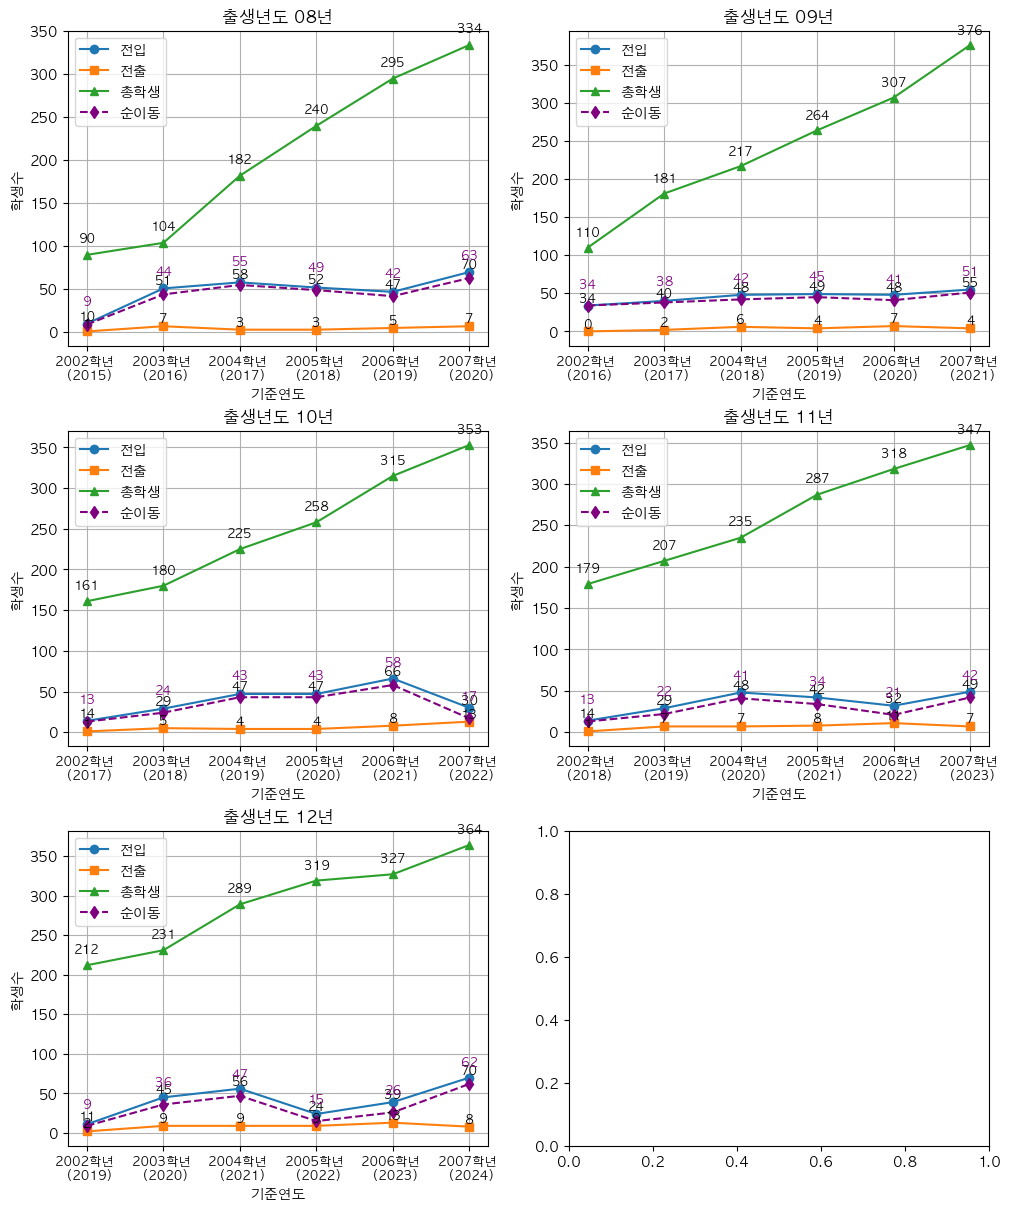

In [19]:
import matplotlib.pyplot as plt
import math

# 출생년도 리스트
birth_years = sorted(df_filtered['출생년도'].unique())
n_years = len(birth_years)

# 전체 subplot 수 계산 (2개씩 한 줄에)
n_cols = 2
n_rows = math.ceil(n_years / n_cols)

# 그래프 그리기
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4), constrained_layout=True)

# 2D 배열이므로 flatten
axes = axes.flatten()

for i, by in enumerate(birth_years):
    df_sub = df_filtered[df_filtered['출생년도'] == by]
    df_pivot = df_sub.pivot_table(index='기준연도', columns='구분', values='학생수', aggfunc='sum')
    ax = axes[i]

    # 순이동량 계산
    if 'in' in df_pivot.columns and 'out' in df_pivot.columns:
        df_pivot['net'] = df_pivot['in'] - df_pivot['out']

    offset_map = {
        'in': 2,
        'out': 2,
        'ttl': 12,
        'net': 20
    }

    for col, marker in [('in', 'o'), ('out', 's'), ('ttl', '^'), ('net', 'd')]:
        if col in df_pivot.columns:
            y_vals = df_pivot[col]
            linestyle = '--' if col == 'net' else '-'
            color = 'purple' if col == 'net' else None
            label_map = {'in': '전입', 'out': '전출', 'ttl': '총학생', 'net': '순이동'}

            ax.plot(df_pivot.index, y_vals, marker=marker, linestyle=linestyle, color=color, label=label_map[col])
            for x, y in zip(df_pivot.index, y_vals):
                offset = offset_map[col]
                ax.text(x, y + offset, f'{y}', ha='center', va='bottom', fontsize=9, color=color if col == 'net' else 'black')

    # ✅ 학년 + 연도 형식으로 x축 레이블 변경
    new_labels = [f"{int(x) - int(by) - 6 + 1}학년 \n ({x})" for x in df_pivot.index]
    ax.set_xticks(df_pivot.index)
    ax.set_xticklabels(new_labels, rotation=0, fontsize=9)

    ax.set_title(f'출생년도 {by}년')
    ax.set_xlabel('기준연도')
    ax.set_ylabel('학생수')
    ax.grid(True)
    ax.legend()